In [2]:
import pandas as pd
import re
import math
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib import pyplot


In [3]:
def process_csv(filename, location):
    df = pd.read_csv(filename)
    df["SN"] = df["Info"].map(lambda x: re.findall(r"SN=(\d+)", x)[0])
    df["rssi"] = df["rssi"].map(lambda x: int(re.findall(r"(-?\d+) dBm", x)[0]))
    df["location"] = location
    return df.filter(["SN", "rssi", "location"])

In [4]:
def merge_data(dfm, dfn, dfb):
    return dfm.join(dfn, rsuffix="_n").join(dfb, rsuffix="_b").filter(["SN", "rssi", "rssi_n", "rssi_b", "location"])

In [5]:
def get_data(location):
    l = process_csv("{location}.csv".format(location=location), location)
    ln = process_csv("nihat/{location}.csv".format(location=location), location)
    lb = process_csv("burak/{location}.csv".format(location=location), location)
    return merge_data(l, ln, lb)

In [6]:
train_data = pd.DataFrame()    
test_data = pd.DataFrame()

In [7]:
def split_to_train_and_test(location):
    global train_data
    global test_data
    data = get_data(location)
    l = len(data)
    train_size = math.floor(3 * l / 4)
    return data[0:train_size], data[train_size:]

In [8]:
for loc in range(1, 7):
    print("Adding location {l} to train data".format(l=loc))
    train, test = split_to_train_and_test(loc)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])
    
train_data = train_data.reset_index()
test_data = test_data.reset_index()


Adding location 1 to train data
Adding location 2 to train data
Adding location 3 to train data
Adding location 4 to train data
Adding location 5 to train data
Adding location 6 to train data


Text(0, 0.5, 'rssi_b')

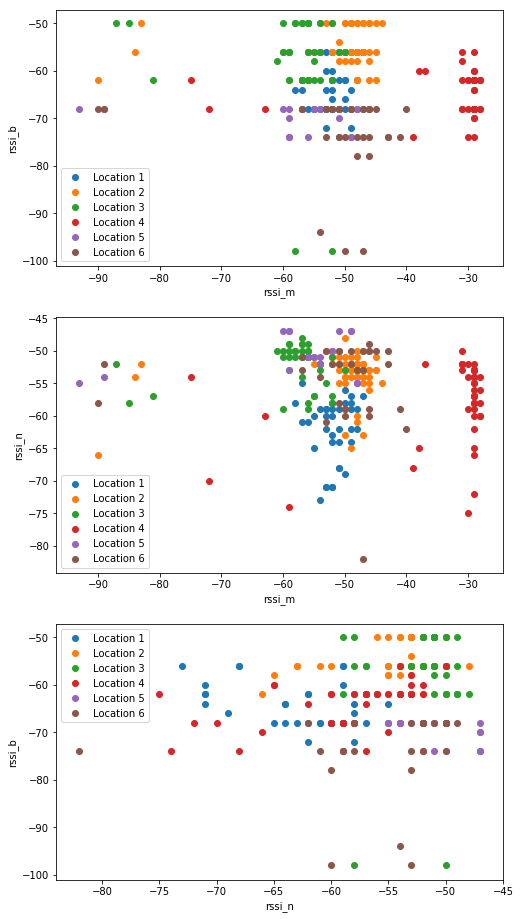

In [91]:
#colors = ["blue", "green", "yellow", "red", "purple", "magenta"]

fig, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=(8,16))
for g_id, group in train_data.groupby("location"):
    ax1.scatter(group["rssi"], group["rssi_b"], label="Location " + str(g_id))
    ax2.scatter(group["rssi"], group["rssi_n"], label="Location " + str(g_id))
    ax3.scatter(group["rssi_n"], group["rssi_b"], label="Location " + str(g_id))

ax1.legend()
ax2.legend()
ax3.legend()

ax1.xaxis.set_label_text("rssi_m")
ax1.yaxis.set_label_text("rssi_b")

ax2.xaxis.set_label_text("rssi_m")
ax2.yaxis.set_label_text("rssi_n")

ax3.xaxis.set_label_text("rssi_n")
ax3.yaxis.set_label_text("rssi_b")
    

In [8]:
def input_fn_train():
    features = train_data.filter(["rssi", "rssi_n", "rssi_b"]).values
    labels = train_data["location"].values
    return features, labels

In [13]:
def input_fn_eval():
    features = test_data.filter(["rssi", "rssi_n", "rssi_b"]).values
    labels = test_data["location"].values
    return features, labels

In [20]:
train_data

,index,SN,rssi,rssi_n,rssi_b,location
0,0,835,-48,-62,-62,1
1,1,836,-48,-55,-56,1
2,2,900,-49,-57,-56,1
3,3,965,-50,-56,-62,1
4,4,966,-50,-58,-62,1
5,5,967,-49,-62,-68,1
6,6,1029,-53,-62,-72,1
7,7,1157,-49,-58,-72,1
8,8,1159,-47,-57,-68,1
9,9,1160,-48,-59,-68,1


In [10]:
def train_model(model, x, y, test_x, test_y):
    model.fit(x, y)
    return model.score(test_x, test_y)

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)
x, y = input_fn_train()
test_x, test_y = input_fn_eval()
print("Model accuracy: ", train_model(knn, x, y, test_x, test_y))

correctAnswers = pd.DataFrame(list(map(lambda x: (x[1], x[0] == x[1]), list(zip(knn.predict(test_x), test_y)))))

Model accuracy:  0.7283950617283951


[0.35714286 0.95       0.8        0.9375     0.33333333 0.6       ]


<BarContainer object of 6 artists>

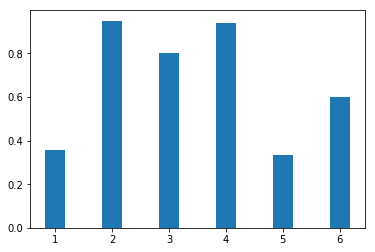

In [17]:
res = correctAnswers.groupby(0).mean().values[:,0]

width = 0.35
idx = np.array([1, 2, 3, 4, 5, 6])

print(res)
pyplot.bar(idx, res, width, label="wow1")
#pyplot.bar(idx + width / 2, res+0.2, width, label="wow2")

In [12]:
# save model into a pickle
import pickle
with open("model.pickle", "wb") as f:
    pickle.dump(knn, f)